# Install Libraries

In [444]:
!pip install Fortuna

In [445]:
!pip install names

In [446]:
import pandas as pd
from Fortuna import RelativeWeightedChoice
import names
import random

# Data

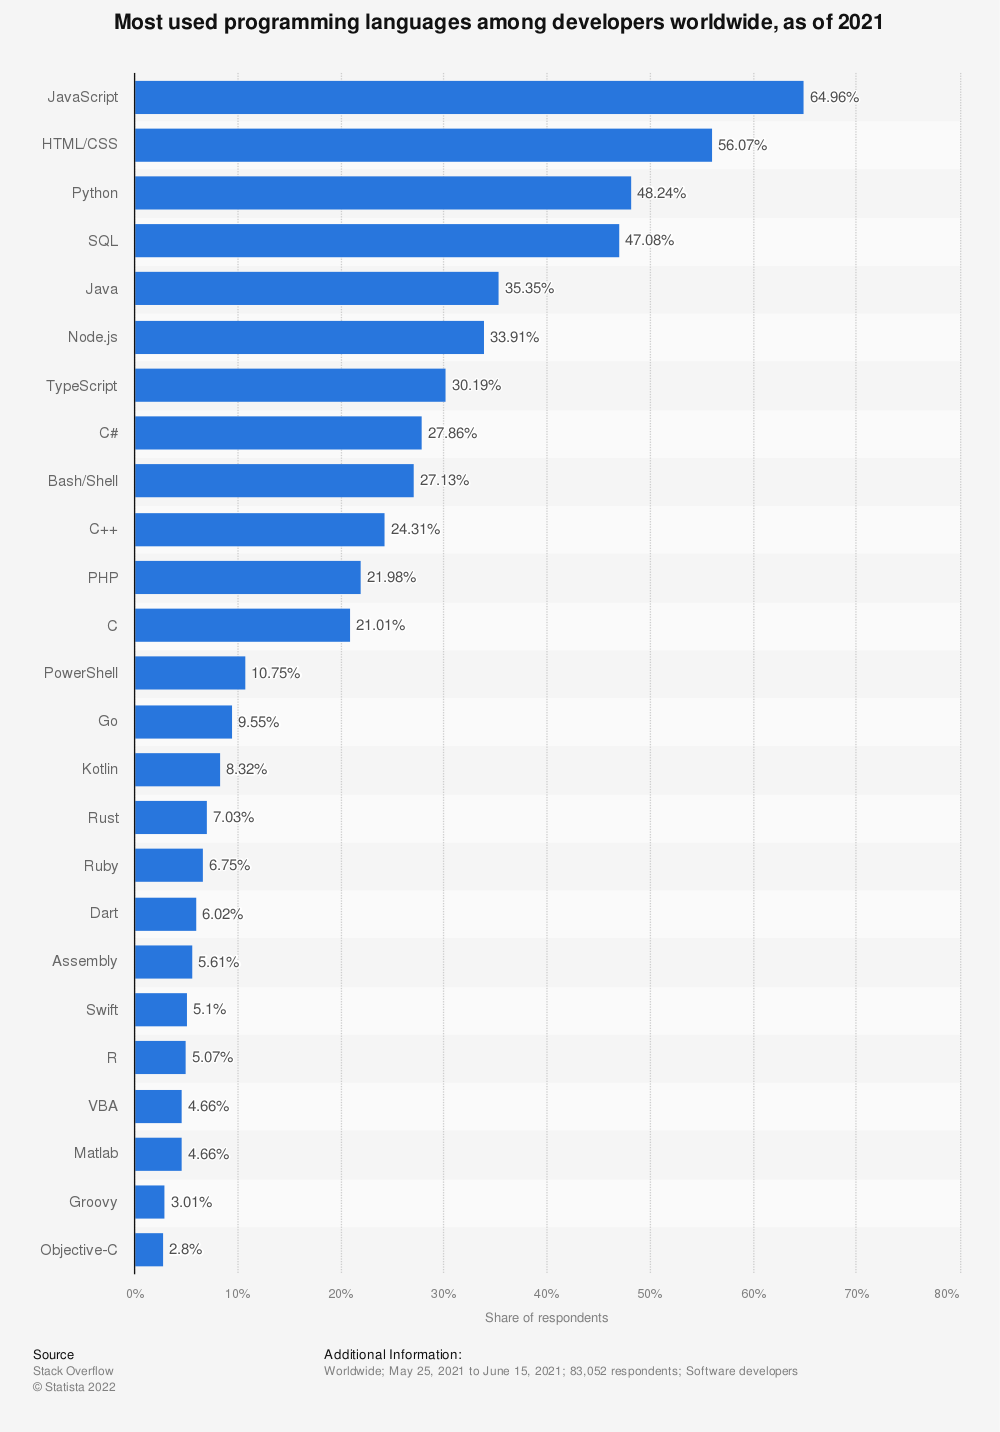

Assumption: The distribution of the desired programming languages of the mentees and the known programming languages of the mentors will be similar to the distribution of the most used programming languages in 2021.

### Upload 'statista_data.csv' to Colab or put file in your current folder
The csv file should be found in GitHub: BloomTech-Labs/underdog-devs-ds-a/notebooks

The 'statista_data.csv' is from Statista.com. The csv data matches the chart.

In [447]:
df = pd.read_csv('statista_data.csv', names=["language", "distribution"])

In [448]:
# Calculating Percentage
df['percent'] = (df['distribution'] / 
                  df['distribution'].sum()) * 100

In [449]:
# The 'percent' column total is now equal to 1.0
df.head()

,language,distribution,percent
0,JavaScript,64.96,12.554598
1,HTML/CSS,56.07,10.836458
2,Python,48.24,9.323180
3,SQL,47.08,9.098991
4,Java,35.35,6.831974


In [450]:
language_list = []
for i in df['language']:
  language_list.append(i)

percent_list = []
for i in df['percent']:
  percent_list.append(i)

In [451]:
language_distribution = zip(percent_list, language_list)

# Using Fortuna to Randomly Choose a Language
The random choice corresponds to the probability distribution of the languages  
  
Example: Python has a 9.32% chance of being chosen.

In [452]:
random_language = RelativeWeightedChoice(language_distribution)

In [453]:
random_language()

'PHP'

# Create RandomMentee Class and Dataframe

In [454]:
class RandomMentee:

  def __init__(self):
    self.id = str(random.randint(10000000,50000000))
    self.name = names.get_full_name()
    self.language = random_language()
  
  def __repr__(self):
    output = (
        f"ID: {self.id}",
        f"Name: {self.name}",
        f"Language: {self.language}",
    )
    return "\n".join(output)
  
  def to_dict(self):
    return {
        "id": self.id,
        "name": self.name,
        "language": self.language,
    }

In [455]:
# Suppose there are 100 mentees
mentee_df = pd.DataFrame(RandomMentee().to_dict() for _ in range(100))

In [456]:
mentee_df.head()

,id,name,language
0,33247344,Lesa Valcarcel,Python
1,27674388,Tommy Drennon,Java
2,14136744,John Stanley,TypeScript
3,19281044,Jane Gordon,JavaScript
4,45996550,David Fulton,JavaScript


In [457]:
# dataframe language distribution matches chart above (more or less)
mentee_df["language"].value_counts(normalize=True)

JavaScript    0.12
TypeScript    0.11
Java          0.10
Bash/Shell    0.09
C++           0.08
HTML/CSS      0.08
Python        0.07
SQL           0.06
Go            0.04
C#            0.04
PHP           0.04
Node.js       0.04
PowerShell    0.02
Kotlin        0.02
Assembly      0.02
Dart          0.02
Matlab        0.01
Swift         0.01
C             0.01
Ruby          0.01
R             0.01
Name: language, dtype: float64

# Create RandomMentor Class and Dataframe

In [458]:
def get_unique_languages():
  """
  Generates a list of 3 languages for each random mentor.
  All of the languages will be unique.
  """

  random_languages = []
  while len(random_languages) < 3:
    random_languages.append(random_language())
    
    # Ensure no duplicate languages are added to the list
    if len(set(random_languages)) < len(random_languages):
      random_languages.pop()
  
  
  return random_languages

In [459]:
get_unique_languages()

['Ruby', 'JavaScript', 'Assembly']

In [460]:
class RandomMentor:
  def __init__(self):
    self.id = str(random.randint(50000000,100000000))
    self.name = names.get_full_name()
    self.languages = get_unique_languages()
  
  def __repr__(self):
    output = (
        f"ID: {self.id}",
        f"Name: {self.name}",
        f"Language List: {self.languages}",
    )
    return "\n".join(output)
  
  def to_dict(self):
    return {
        "id": self.id,
        "name": self.name,
        "languages": self.languages,
    }

In [461]:
mentor = RandomMentor()
mentor

ID: 83660057
Name: Victoria Dennison
Language List: ['Python', 'C', 'Java']

In [462]:
# Suppose there are 50 mentors
# Suppose there are 2 mentees for every 1 mentor
mentor_df = pd.DataFrame(RandomMentor().to_dict() for _ in range(50))

In [463]:
mentor_df.head()

,id,name,languages
0,98704632,Albert Horton,"[TypeScript, Bash/Shell, Python]"
1,61285445,Carol Rice,"[R, Python, HTML/CSS]"
2,57521015,Richard Bala,"[C, Node.js, TypeScript]"
3,97792790,Andrew Winkel,"[HTML/CSS, Java, JavaScript]"
4,69562772,Bernice Libby,"[PowerShell, PHP, Groovy]"


# Match Mentees and Mentors

In [464]:
# Initialize a dataframe to append the matches to
matching_df = pd.DataFrame(columns=[['mentee_id', 'mentee_name', 'mentor_id', 'mentor_name']])
matching_df

,mentee_id,mentee_name,mentor_id,mentor_name


In [465]:
# Loop through mentees/mentors and match them up
for i, mentee_language in enumerate(mentee_df['language']):
  for j, mentor_language_list in enumerate(mentor_df['languages']):
    if mentee_language in mentor_language_list:

      # Don't assign a mentor to more than 3 mentees
      current_mentor_id = mentor_df['id'][j]
      if current_mentor_id in matching_df.values:
        if matching_df[['mentor_id']].value_counts()[current_mentor_id][0] >= 3:
          continue
      
      # Continue the for loop after each mentee has been added
      current_mentee_id = mentee_df['id'][i]
      if current_mentee_id in matching_df.values:
        continue

      # Append mentor/mentee data into the a matching dataframe
      matching_df.loc[len(matching_df.index)] = [mentee_df['id'][i],
                                        mentee_df['name'][i],
                                        mentor_df['id'][j],
                                        mentor_df['name'][j]]

In [466]:
matching_df

,mentee_id,mentee_name,mentor_id,mentor_name
0,33247344,Lesa Valcarcel,98704632,Albert Horton
1,27674388,Tommy Drennon,97792790,Andrew Winkel
2,14136744,John Stanley,98704632,Albert Horton
3,19281044,Jane Gordon,97792790,Andrew Winkel
4,45996550,David Fulton,97792790,Andrew Winkel
...,...,...,...,...
92,25393272,Ruby Schulz,91633268,Dana Montes
93,48090717,Charles Torres,65623091,Melissa Avera
94,43753460,Lawrence Moss,62528906,June Mclendon
95,39715995,Billie Gomez,67350612,Helen Swenson


In [467]:
# No duplicate mentees
matching_df[['mentee_id']].duplicated().any()

False

In [468]:
# All mentors have 3 or less mentees
matching_df[['mentor_id']].value_counts()

(mentor_id,)
98952593        3
76671282        3
55118160        3
55275752        3
55492030        3
56033861        3
57521015        3
58073555        3
59766197        3
61050101        3
61285445        3
62528906        3
63540140        3
64332632        3
69562772        3
98704632        3
69581808        3
88430109        3
86297733        3
97826921        3
97792790        3
97256794        3
96825083        3
94351061        3
80445784        3
50956056        3
84812178        3
84453615        3
84136262        3
83473242        3
91633268        2
90594181        1
57712221        1
65623091        1
67350612        1
72580165        1
dtype: int64

### Limitation: Some mentees are not automatically placed with a mentor.

In [469]:
# Find mentees without a mentor
no_mentor_df = pd.DataFrame(columns=[['mentee_id', 'mentee_name']])

for i, id in enumerate(mentee_df['id']):
  if id not in matching_df.values:
    no_mentor_df.loc[len(no_mentor_df.index)] = [mentee_df['id'][i],
                                        mentee_df['name'][i]]

no_mentor_df

,mentee_id,mentee_name
0,32995776,Donald Vega
1,21332329,Nancy Griffith
2,46088031,Terry Bassett
